<a href="https://colab.research.google.com/github/oscardominguez-ds/Explaining-Datasets/blob/main/Project_2_Part_2%2C3(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Oscar Dominguez - 03/23/2023
##Assignment - Project 2 Part 3.
\*Included in this assignment are Projects Parts 2 and 3*

##Part 2 -

Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.
To meet the requirements for this week you must have:
-Deleted unnecessary columns.

-Deleted duplicate rows.

-Identified and addressed missing values.

-Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).

-Produced univariate visuals for the target and all features.

-Identified outliers.

-Clearly commented all of your cleaning steps and described any decisions you made.

Source of data
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

#Part 2

In [1]:
from sklearn.compose import make_column_selector

In [2]:
## Load the data
import pandas as pd
df = pd.read_csv('/content/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
#Checking for impossible values. MaxHR has max of 202 which is very high but will leave value
#because it could be an outlier stake holders may need to look into.
# RestingBP, Cholesterol, FastingBS all have mins of zero which we will replace with mean of the column.
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
#Locating row
df.loc[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [6]:
#Locating row
df.loc[df['Oldpeak'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
904,56,M,ATA,120,240,0,Normal,169,N,0.0,Down,0
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [7]:
restingbp_col = df['Oldpeak']
restingbp_col.replace(to_replace = 0, value = restingbp_col.mean(), inplace=True)

In [8]:
#Filling RestingBP row that has a value 0 with mean of the column and displaying correction
restingbp_col = df['RestingBP']
restingbp_col.replace(to_replace = 0, value = restingbp_col.mean(), inplace=True)

df.iloc[[449]]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,132.396514,0,0,Normal,155,N,1.5,Flat,1


In [9]:
#Filling Cholesterol rows with 0 value with the mean of the column
cholesterol_col = df['Cholesterol']
cholesterol_col.replace(to_replace = 0, value = cholesterol_col.mean(), inplace=True)

In [10]:
#Filling FastingBS rows with 0 value with the mean of the column 
fastingbs_col = df['FastingBS']
fastingbs_col.replace(to_replace = 0, value = fastingbs_col.mean(), inplace=True)

In [11]:
#Checking to ensure mins of 0 for have been filled with the mean of the column
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540737,236.047413,0.411888,136.809368,1.243083,0.553377
std,9.432617,17.989932,56.240952,0.324427,25.460334,0.833608,0.497414
min,28.000000,80.000000,85.000000,0.233115,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,198.799564,0.233115,120.000000,0.887364,0.000000
50%,54.000000,130.000000,223.000000,0.233115,138.000000,0.887364,1.000000
75%,60.000000,140.000000,267.000000,0.233115,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


##Deleted duplicate rows

In [12]:
#Pringing duplicates
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


##Deleted unnecessary columns.

In [13]:
#There are no columns that are identifiers such as IDs, dates, or counters. Hence, no columns will be deleted.

##Identify and address missing values.

In [14]:
 #Checking missing values. There are no missing values.
 df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

##Identify and correct inconsistencies in data for categorical 

In [15]:
#Printing columns to double check they look ok.
cat_cols = make_column_selector(dtype_include='object')(df)

for col in cat_cols:
  display(df[col].value_counts(normalize=True))

M    0.78976
F    0.21024
Name: Sex, dtype: float64

ASY    0.540305
NAP    0.221133
ATA    0.188453
TA     0.050109
Name: ChestPainType, dtype: float64

Normal    0.601307
LVH       0.204793
ST        0.193900
Name: RestingECG, dtype: float64

N    0.595861
Y    0.404139
Name: ExerciseAngina, dtype: float64

Flat    0.501089
Up      0.430283
Down    0.068627
Name: ST_Slope, dtype: float64

##-Produced univariate visuals for the target and all features.
##-Identified outliers.


Text(0.5, 1.0, 'Heart Disease')

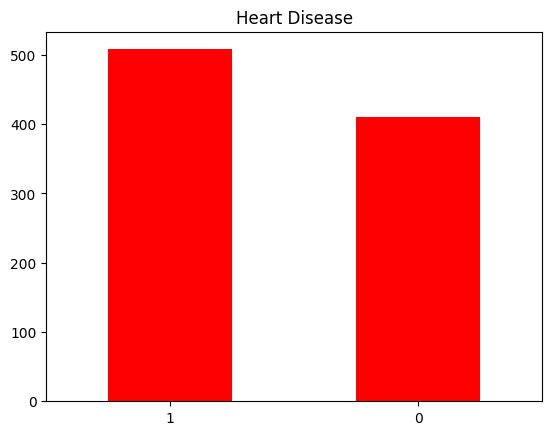

In [16]:
#importig library for bar plot
import matplotlib.pyplot as plt

# Using matplotlib directly
df['HeartDisease'].value_counts().plot.bar(rot=0, color='Red')
plt.title('Heart Disease')


Text(0.5, 1.0, 'Chest Pain Type')

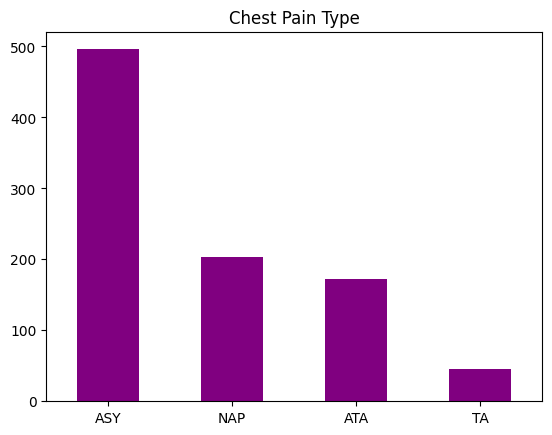

In [17]:
# Using matplotlib directly
df['ChestPainType'].value_counts().plot.bar(rot=0, color='Purple')
plt.title('Chest Pain Type')


Text(0.5, 1.0, 'Sex')

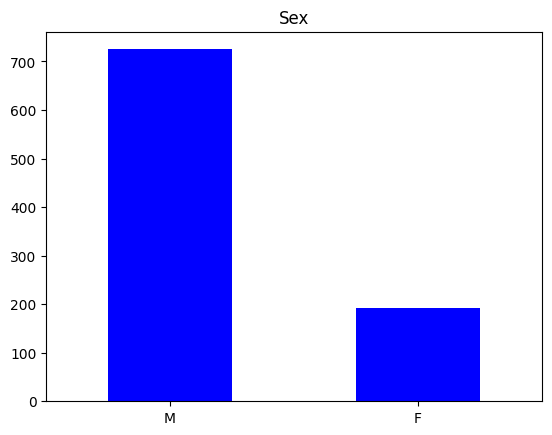

In [18]:
# Using matplotlib directly
df['Sex'].value_counts().plot.bar(rot=0, color='Blue')
plt.title('Sex')

Text(0.5, 1.0, 'Resting ECG')

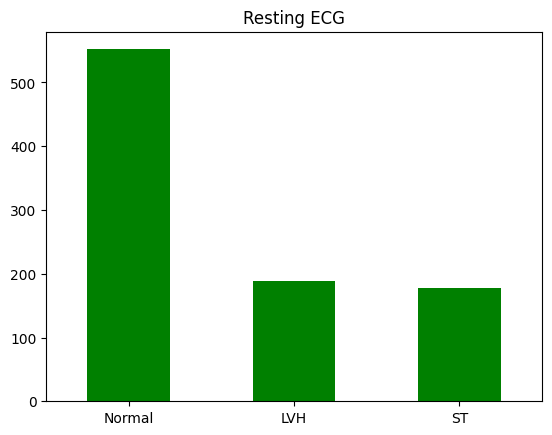

In [19]:
# Using matplotlib directly
df['RestingECG'].value_counts().plot.bar(rot=0, color='Green')
plt.title('Resting ECG')

Text(0.5, 1.0, 'Exercise Angina')

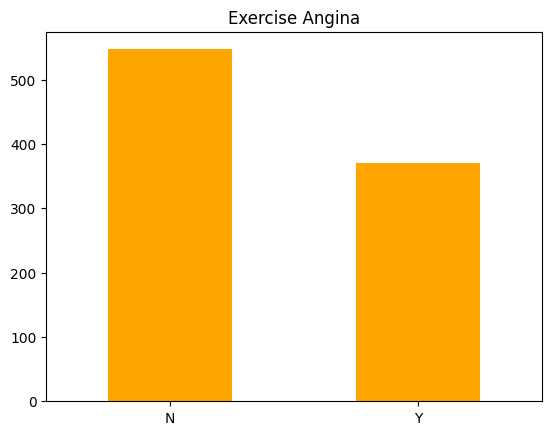

In [20]:
# Using matplotlib directly
df['ExerciseAngina'].value_counts().plot.bar(rot=0, color='Orange')
plt.title('Exercise Angina')

Text(0.5, 1.0, 'ST Slope')

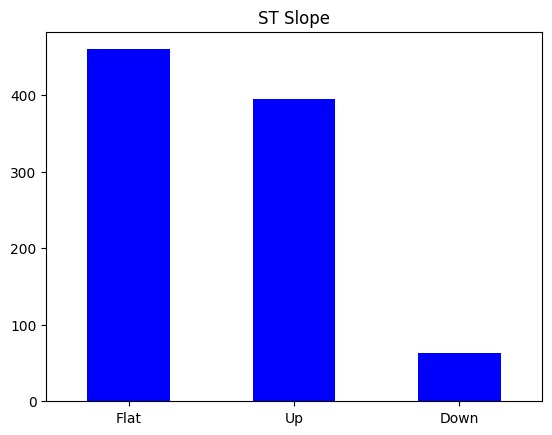

In [21]:
# Using matplotlib directly
df['ST_Slope'].value_counts().plot.bar(rot=0, color='Blue')
plt.title('ST Slope')

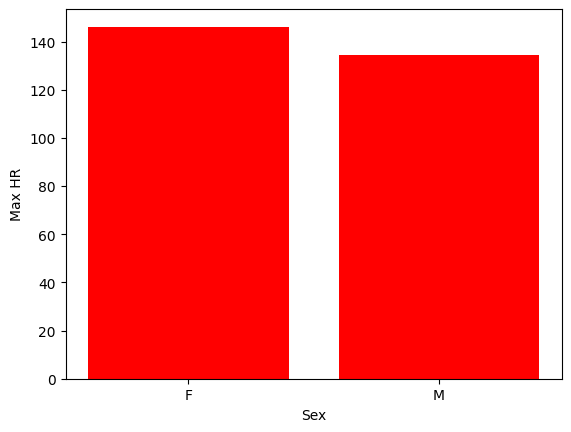

In [22]:
# Using matplotlib directly
maxhr_mean = df.groupby('Sex')['MaxHR'].mean()

fig, ax = plt.subplots()
ax.bar(maxhr_mean.index, maxhr_mean.values,color='Red' )
ax.set_ylabel('Max HR')
ax.set_xlabel('Sex');

###Outliers -  there are some younger patients with heart disease

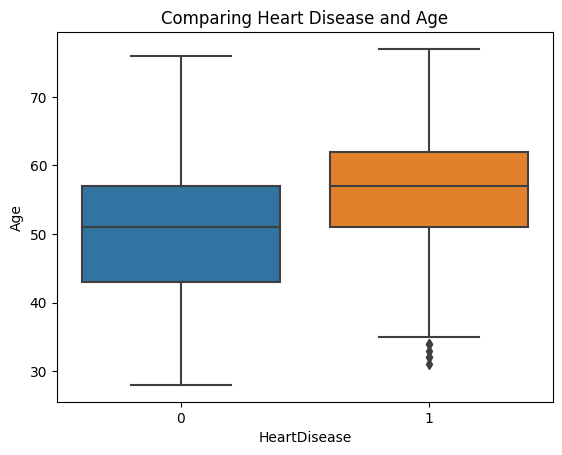

In [23]:
#Importing library for Seaborn boxplot
import seaborn as sns

# Boxplot with seaborn
ax = sns.boxplot(x='HeartDisease', y='Age', data=df)
ax.set_title("Comparing Heart Disease and Age");


###Outliers - There are patients with and withou heart disease have higher than the mean blood presure

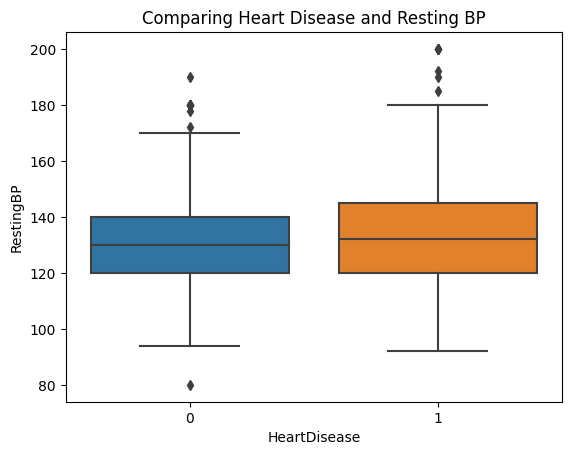

In [24]:
#Boxplot with seaborn
ax = sns.boxplot(x='HeartDisease', y='RestingBP', data=df)
ax.set_title("Comparing Heart Disease and Resting BP");

###Outliers - both patients with and without heard disease have higher than normal Cholesterol

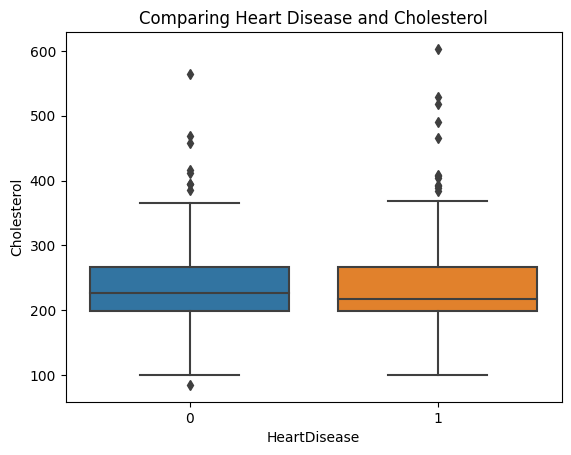

In [25]:
# Boxplot with seaborn
ax = sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
ax.set_title("Comparing Heart Disease and Cholesterol");

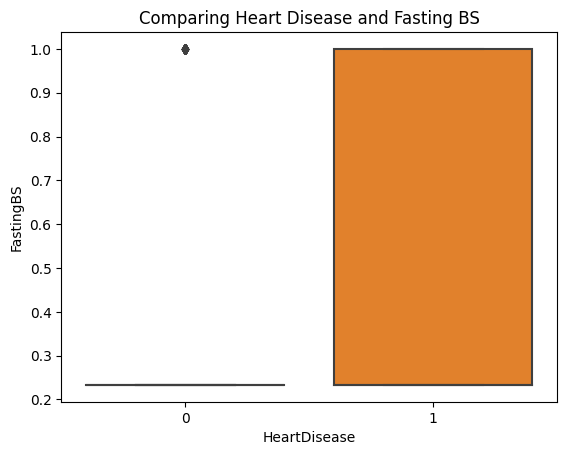

In [26]:
# Boxplot with seaborn
ax = sns.boxplot(x='HeartDisease', y='FastingBS', data=df)
ax.set_title("Comparing Heart Disease and Fasting BS");

###Outliers -  some patients have a low heart rate compared to others. Some of the low heart rate patients have malignant 

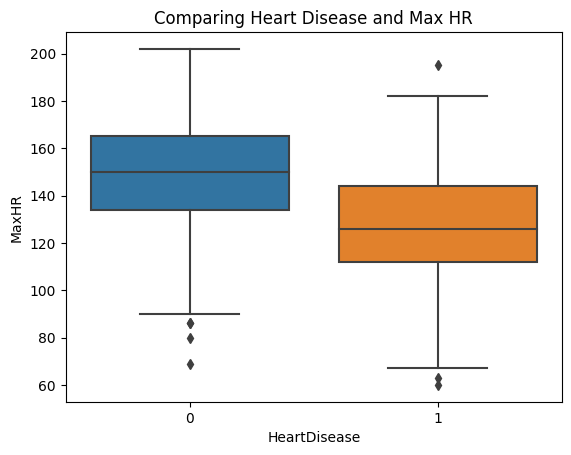

In [27]:
# Boxplot with seaborn
ax = sns.boxplot(x='HeartDisease', y='MaxHR', data=df)
ax.set_title("Comparing Heart Disease and Max HR");

###Outliers - Oldpeak has some outliers in both target categories. 

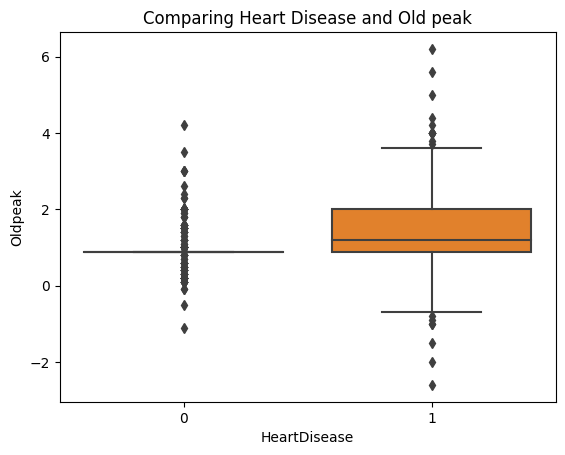

In [28]:
# Boxplot with seaborn
ax = sns.boxplot(x='HeartDisease', y='Oldpeak', data=df)
ax.set_title("Comparing Heart Disease and Old peak");

#Part 3 -

1.For this part of the project, you will continue your data exploration by:
1.   Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.

2.   Creating multivariate (multiple variables) exploratory visualizations to further understand your data and search for trends.


In [29]:
corr = df.corr()

##In the heat map below, thereis a low correlation between Oldpeak and HeatDisease

<Axes: >

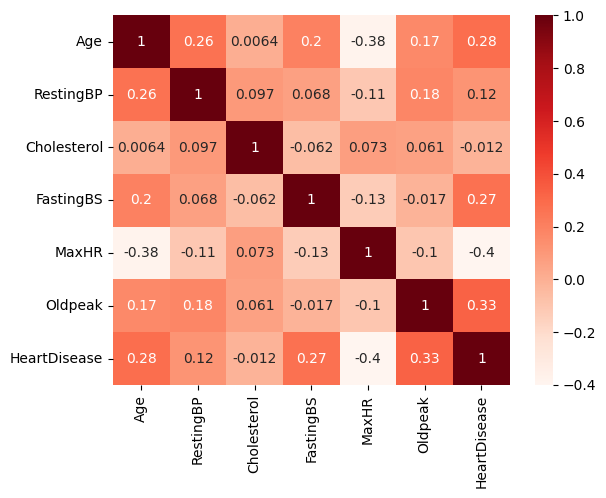

In [30]:
import seaborn as sns
sns.heatmap(corr, cmap = 'Reds', annot = True)

##There is a low correlation between HeartDisease and Oldpeak
##Since the rest of the values were below 0.3 in magnitude, I did not identify any other relationships between variables in our dataset.

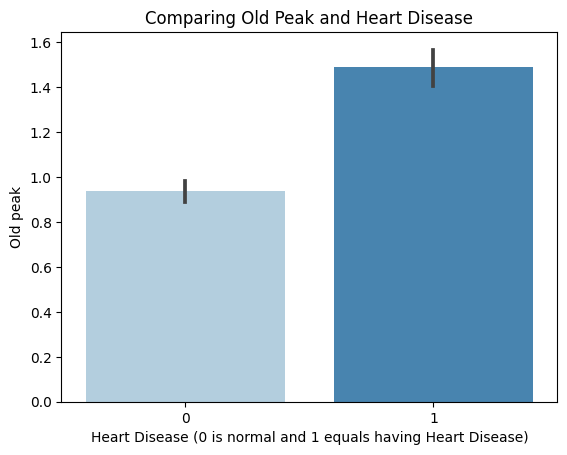

In [46]:
## Using seaborn to plot the means to further explain correlation
ax = sns.barplot(data=df, x='HeartDisease', y='Oldpeak',palette = "Blues");
ax.set_title("Comparing Old Peak and Heart Disease");
ax.set(xlabel='Heart Disease (0 is normal and 1 equals having Heart Disease)', ylabel='Old peak')
plt.show()

#2.Then, choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder. These visuals should be reporting quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither of these should be histograms, boxplots, or correlation plots).

##1. These plots should be so simple, and so easy to read, that a 6th grader could understand them in less than 10 seconds without asking questions.  They don't need to be fancy, they need to CLEARLY show an interesting trend or correlation between features in your data.

##- I am using only one plot since there were only two features found that correlate.

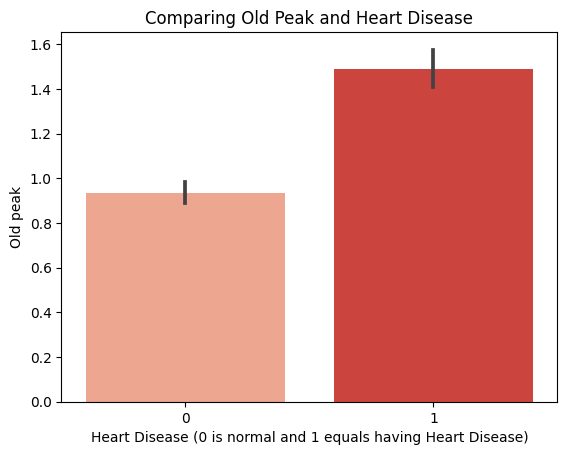

In [47]:
# Using the same chart above to display correlation since our target is either 0 for normal or 1 heart disease, displaying using
# basically any other graph such as Scatterplot, Line graphs or Histograms will not display correctly.
ax = sns.barplot(data=df, x='HeartDisease', y='Oldpeak',palette = "Reds");
ax.set_title("Comparing Old Peak and Heart Disease");
ax.set(xlabel='Heart Disease (0 is normal and 1 equals having Heart Disease)', ylabel='Old peak')
plt.show()